# Computer Vision SICSS-Zurich

## Friday, 18 June 2021

### Philine Widmer, Elliott Ash, Malka Guillot  <img src="dreamstime_xs_147338337.jpg" width="200">

## Task 0: Set-up your virtual environment
Before running this notebook, install a virtual conda environment where you install `tensorflow`. Consult the following instructions:
https://stackoverflow.com/questions/43216256/running-tensorflow-in-jupyter-notebook

The assignment assumes the following folder structure:

> cv_sicss

>> code

>> images

>> models

It is assumed that this notebook lies in `code`. Thus, relative paths to `images` and `models` are specified.


Make sure to download the sample images:

In [29]:
# Cat image
! curl https://raw.githubusercontent.com/computational-social-science-zurich/sicss-zurich/main/notebooks/images/cat.png > ../images/cat.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 50652  100 50652    0     0   105k      0 --:--:-- --:--:-- --:--:--  105k


In [30]:
# Woman's image
! curl https://raw.githubusercontent.com/computational-social-science-zurich/sicss-zurich/main/notebooks/images/linz.jpg > ../images/linz.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 64894  100 64894    0     0   159k      0 --:--:-- --:--:-- --:--:--  159k


## Task 1: Getting Started

### How can we read an image in Python?

We are the using the opencv-python (stands for open-source computer vision) library, imported as `cv2`. It is one of the most popular computer vision libraries in Python, if not the most popular one.

In [31]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
# When using cv2's imread function, we are requesting the image to be read as a three channel BGR color image
cat = cv2.imread('../images/cat.png', cv2.IMREAD_COLOR)

# You can experiment with other specifications, such as cv2.IMREAD_GRAYSCALE
# Complete the function arguments
cat_gray = cv2.imread(...)

Inspecting the cat object, we see it is a numpy array. We can also print its shape and the data type.

In [33]:
print(cat.shape, cat.dtype, type(cat))

# Do the same for the grayscale cat
...

(549, 976, 3) uint8 <class 'numpy.ndarray'>
(549, 976) uint8 <class 'numpy.ndarray'>


Why is the shape of the grayscale cat and the BGR color cat different?
Note that some images also contain an alpha channel, which would add a fourth dimension.

In [34]:
cat

array([[[119, 131, 135],
        [119, 131, 135],
        [119, 131, 135],
        ...,
        [ 93, 108, 111],
        [ 92, 107, 110],
        [ 92, 107, 110]],

       [[119, 131, 135],
        [120, 132, 136],
        [120, 132, 136],
        ...,
        [ 93, 108, 111],
        [ 93, 108, 111],
        [ 92, 107, 110]],

       [[120, 132, 136],
        [120, 132, 136],
        [121, 133, 137],
        ...,
        [ 94, 109, 112],
        [ 93, 108, 111],
        [ 92, 107, 110]],

       ...,

       [[162, 191, 206],
        [162, 191, 206],
        [162, 191, 206],
        ...,
        [157, 187, 206],
        [155, 185, 204],
        [153, 183, 202]],

       [[163, 192, 207],
        [163, 192, 207],
        [163, 192, 207],
        ...,
        [157, 187, 206],
        [155, 185, 204],
        [153, 183, 202]],

       [[164, 193, 208],
        [164, 193, 208],
        [164, 193, 208],
        ...,
        [156, 186, 205],
        [154, 184, 203],
        [152, 182, 201]]

If you want, you can plot a histogram of the pixel values in the three channels. Or you can print the mean, median, or standard deviation for each channel.

How can we plot the image in a human-friendly fashion?
Hint: we are using `matplotlib`!

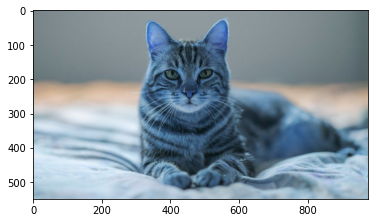

In [35]:
# Try to plot the image as follows
...

Look at the image in your directory (i.e., open it manually on your computer). You will see that the colors are slightly different (with matplotlib, the cat looks blue-ish). Why is that so?

In `cv2`, BGR is h the default color order. `matplotlib` uses RGB instead.
That is, `matplotlib` assumes it reads an image in the channel order RGB, while we actually read it as BGR when we opened it with `cv2`.

We can deal with this by converting the image to RGB before plotting.

In [36]:
# Complete the function arguments
cat_for_plotting = cv2.cvtColor(...)

Now, let's retry plotting our cat.

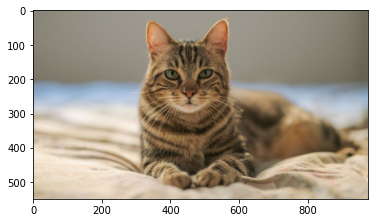

In [37]:
# Add your code here
...

Looks better!

By the way, what do the  `(x,y)` axes stand for in this context?

As a note on this task, there are probably 99 ways to read an image in Python 😉. So feel free to experiment.

## Task 2: Face Detection with "Traditional" Machine Learning

### How can we identify (and localize) faces in an image?

As a social scientist, you might want to analyze images of a gathering (e.g., a protest event) to understand the demographics of the individuals who participated. To begin with, you would need to detect the faces within the images.

For this taks, we are going to use `cv2` again, specifically its `CascadeClassifier()` (which is based on the famous Viola-Jones algorithm).

We will download a pretrained model. We can perform the download in the terminal.

Run the following two lines in your terminal, or run them directly in the notebook here (note that you can access the terminal via jupyter notebook by using a `!` in front of the command).

In [38]:
!mkdir ../models
# Download the pretrained model
!curl https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml > ../models/haarcascade_frontalface_default.xml

mkdir: ../models: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  908k  100  908k    0     0   649k      0  0:00:01  0:00:01 --:--:--  649k


In [39]:
# Load your image
people = cv2.imread('../images/linz.jpg', cv2.IMREAD_COLOR)

# Load the classifier
classifier = cv2.CascadeClassifier('../models/haarcascade_frontalface_default.xml')

# Run face detection
bboxes = classifier.detectMultiScale(people)

# Print the bounding box for each face
for box in bboxes:
    print(box)
    x, y, width, height = box
    x2, y2 = x + width, y + height
    # Draw a rectangle over the pixels
    cv2.rectangle(people, (x, y), (x2, y2), (0,0,255), 1)

How many boxes (aka faces) were detected?

None, as it seems. (We could have already seen this when the previous cell did not print any bounding boxes.)

In [40]:
print(len(bboxes))

0


We can verify this by plotting the image along with the (potential) boxes.

(Don't forget to convert the image to RGB before plotting with matplotlib.)

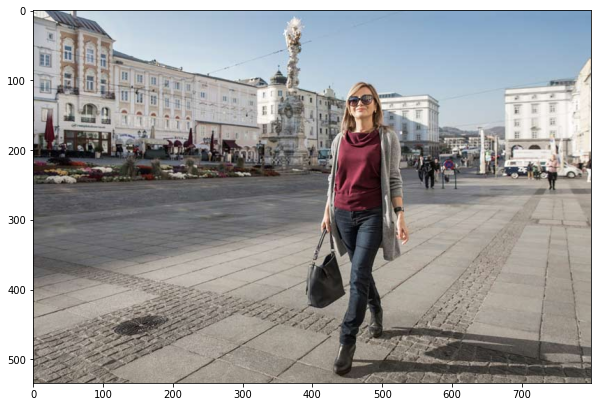

In [41]:
# Add your code here
# You may want to increase the fig size a bit to see potential boxes

Indeed, no face was detected -- what now? There are some arguments in `detectMultiScale()` to tune the classifier.

See here for more: https://docs.opencv.org/2.4/modules/objdetect/doc/cascade_classification.html#cascadeclassifier-detectmultiscale

Here, we are going to explore the `scaleFactor` and `minNeighbors`.

The model that we used defines a fixed face size during the training that is detected. By rescaling your image, you can resize a larger face into a smaller one -- making it detectable by the algorithm. The default value is 1.1 (10% increase). Note that the *higher* the scale factor, the more coarsly the algorithm proceeds. Mabye, the default of 1.1 was already too high for our image. Let's try a smaller one (like 1.005).

In [ ]:
# Re-run your face detection here, but changing the parameters
...

# How many "boxes" do you get?

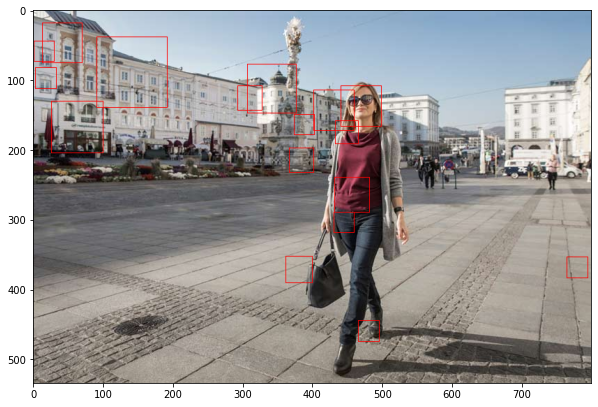

In [43]:
# Plot the image with the boxes (it could look something like this)
...

In our example, we have quite some false-positives now. You can play around with the scale factor until you find a value that works for this image. As with any machine learning application, we need to make sure that the model works for the data at hand. Also, note that the people in the background are not detected as such -- the model aims specifically at detecting *faces*. If you wanted to count pedestrians, for example, the present algorithm might not help much.

## Task 3: Warming Up to Deep Learning

This tutorial is inspired by https://keras.io/examples/vision/mnist_convnet/.

In this warm-up task, we predict labels from 0 to 9 for handwritten digits: the handwritten digits are our predictors and the integers our outcome. We are training a model ourselves (it will be superfast if we only run it for a low number of epochs).

In [44]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

Let's load the MNIST dataset that we downloaded when setting up our folder:

In [45]:
data = np.load('../images/mnist.npz')
x_train = data['x_train']
print('Train samples:', len(x_train))
y_train = data['y_train']
x_test = data['x_test']
print('Test samples:', len(x_test))
y_test = data['y_test']

Train samples: 60000
Test samples: 10000


Remember that MNIST is sample data that you can download from `keras`.
Hence, the `(x_test, x_train, y_train, y_test)` structure is given by `keras`; they already split both the outcome (the number label) and the predictors (the images of handwritten numbers) into training and testing data. For other data, you would, of course, do the split yourself.


`x_text` (and `x_train`, etc.) contain several images. Let's plot one, e.g., `x_test[0]`:

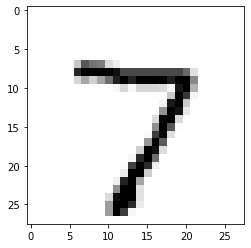

In [46]:
# Plot the image here
...

Note that contrary to the images we plotted above (with three channels), the digit only one comes with one channel:

In [47]:
x_test[0].shape

(28, 28)

Next, we scale the values to the [0,1] range. In a computer, for every channel (e.g., black/white), a pixel value is represented as an integer between 0 and 255, or as a floating point value value between 0 and one. Here, we convert the integers between 0 and 255 to floating point values. (You can verify that they come with values between 0 and 255 by looking at the arrays yourself.)

In [48]:
x_train = # Rescale the images
x_test = # Rescale the images

Depending on the data, we may also have to resize images to the same shape. Here, it is not necessary: all of them are already 28 times 28 pixels. If reshaping was needed, we could use `cv2.resize()`.

In [49]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

Now, we are building the model. Let's specify the number of classes and the input shape. We have 10 classes (all digits between 0 and 9).

In [50]:
num_classes = 10
input_shape = (28, 28, 1)

In [51]:
# Next, we have to convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In the following model, you will see eight layers:

- There is one input layer.
- We have two convolutional layers: `layers.Conv2D()` (they extract the features). The hyperparameters of 32 and 64 here represent the number of filters (referred to as "layer depth" in the Torres and Cantu, 2021). The `kernel_size` specifies the height and width of the 2D convolution window (referred to as "filter size" in Torres and Cantu, 2021).
- There are two pooling layers. Pooling layers progressively reduce the spatial size of the representation. Here, for every 2 times 2 area, we only keep the maximum value).
- The flattening layer compresses our matrix to one dimension (we need to pass a one-dimensional signal to the output layer).
- We have a dense layer which is the output layer.
- The dropout layer specifies how many input units (neurons) we randomly turn off at each step during the training. It should prevent overfitting.

In [52]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

For now, we are going to train the model with 2 epochs and a batch size of 128.

To learn more about the batch size, consult Torres and Cantu (2021).

In [53]:
# Now, choose a batch size and how many epochs you want to run
# Hint: start with a low number of epochs, the training can take a moment
batch_size = ...
epochs = ...

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/2
422/422 [==============================] - 16s 37ms/step - loss: 0.3541 - accuracy: 0.8923 - val_loss: 0.0790 - val_accuracy: 0.9788
Epoch 2/2
422/422 [==============================] - 15s 35ms/step - loss: 0.1125 - accuracy: 0.9646 - val_loss: 0.0560 - val_accuracy: 0.9852


Finally, we can evaluate the model. The output will look something like the print below. As you can see, we got pretty good accuracy (we had only specified two epochs).

In [54]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.057304151356220245
Test accuracy: 0.9821000099182129


Now, you can experiment with the hyperparamets above. How does the accuracy change as you modify the number of filters, the kernel size, the dropout rate, ...? You can also try to remove one layer.

## More ideas what you could do

Next, you could try to use a pre-trained deep learning face detection model with `tensorflow`/`keras` (with the picture above or with a different picture).

You could also read up on how to do transfer learning with `keras`.